### Import Modules & Define Functions

In [1]:
import os
import json
import glob
import seaborn
import scipy.stats
import numpy as np
import pandas as pd
import urllib as ulr
import geopandas as gp
import matplotlib.pylab as pl
import statsmodels.formula.api as smf
%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def curlfile(url, outfile):
    """Downloads file from url to PUIdata, returns output file path.
    Arguments:
    url - url location of descired file (string).
    outfile - name of downloaded file (string).
    """
    outfile = os.getenv('PUIDATA') + '/' + outfile
    os.system('curl -o ' + outfile + ' ' + url)
    return outfile

def unzipPUIDATA(infile, outfolder):
    """Unzips file on PUIDATA, returns folder path.
    Arguments:
    infile - filename in PUIDATA
    outfolder - name of unzipped folder
    """
    infile = os.getenv('PUIDATA') + '/' + infile
    outfolder = os.getenv('PUIDATA') + '/' + outfolder + '/'
    os.system('unzip ' + infile + ' -d ' + outfolder)
    return outfolder

# 1. Load & Wrangle Data

In [3]:
nrg_url = 'https://data.cityofnewyork.us/resource/m46j-75iy.json'
nrg_data = ulr.urlopen(nrg_url).read()

In [4]:
nrg = pd.read_json(nrg_data)

In [5]:
nrg_drop = [u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', 
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins', u'reported_water_method',
       u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',  u'reported_property_floor_area_building_s_ft',
       u'weather_normalized_source_eui_kbtu_ft2']
nrg.drop(nrg_drop, axis = 1, inplace = True)
c = ['NumberofBuildings', 'FloorArea', 'BBL', 'SiteEUI(Kbty/ft2)', 'ZipCode']
nrg.columns = c
nrg.dropna(axis = 0, how = 'any', subset = c, inplace = True)
nrg.head()

,NumberofBuildings,FloorArea,BBL,SiteEUI(Kbty/ft2),ZipCode
16,1.0,313200.0,1.013110e+09,125.4,10022.0
45,1.0,184400.0,4.002520e+09,46,11101.0
64,1.0,53168.0,1.007660e+09,122.3,10011.0
65,1.0,364000.0,1.008150e+09,117,10018.0
77,1.0,214110.0,1.005050e+09,82.1,10013.0


In [6]:
url = """https://www1.nyc.gov/assets/planning/download/
zip/data-maps/open-data/mn_mappluto_16v1.zip"""

bld_data = curlfile(url, 'Manhattan_shp.zip')
bld_path = unzipPUIDATA(bld_data, 'Manhattan')

In [7]:
bld = gp.read_file(bld_path + '/MNMapPLUTO.shp')
bld_drop = [    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
        u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry']

In [8]:
bld.drop(bld_drop, axis = 1, inplace = True)
bld.head()

,BBL,BldgArea,NumBldgs,UnitsRes,UnitsTotal
0,1.015450e+09,10885,1,16,18
1,1.007238e+09,89203,1,50,50
2,1.016800e+09,12000,1,10,10
3,1.013850e+09,203490,1,29,32
4,1.011970e+09,13839,1,26,26


In [9]:
c = bld.columns
bld.dropna(axis = 0, how = 'any', subset = c, inplace = True)

In [10]:
bldnrg = bld.merge(nrg, on = 'BBL')
bldnrg.head()

,BBL,BldgArea,NumBldgs,UnitsRes,UnitsTotal,NumberofBuildings,FloorArea,SiteEUI(Kbty/ft2),ZipCode
0,1.007238e+09,89203,1,50,50,1.0,97563.0,68.7,10001.0
1,1.013850e+09,203490,1,29,32,1.0,203490.0,87.4,10021.0
2,1.021740e+09,52920,1,72,72,1.0,52920.0,140.4,10040.0
3,1.008830e+09,98359,1,107,108,1.0,98359.0,96.5,10016.0
4,1.008570e+09,140000,1,134,138,1.0,140000.0,36.4,10016.0


In [11]:
bldnrg['SiteEUI(Kbty/ft2)'] = pd.to_numeric(bldnrg['SiteEUI(Kbty/ft2)'], errors='coerce')
bldnrg['SiteEUITotal'] = bldnrg['SiteEUI(Kbty/ft2)'] * bldnrg['FloorArea']
bldnrg.dtypes

BBL                  float64
BldgArea               int64
NumBldgs               int64
UnitsRes               int64
UnitsTotal             int64
NumberofBuildings    float64
FloorArea            float64
SiteEUI(Kbty/ft2)    float64
ZipCode              float64
SiteEUITotal         float64
dtype: object

# 2. Plot Data

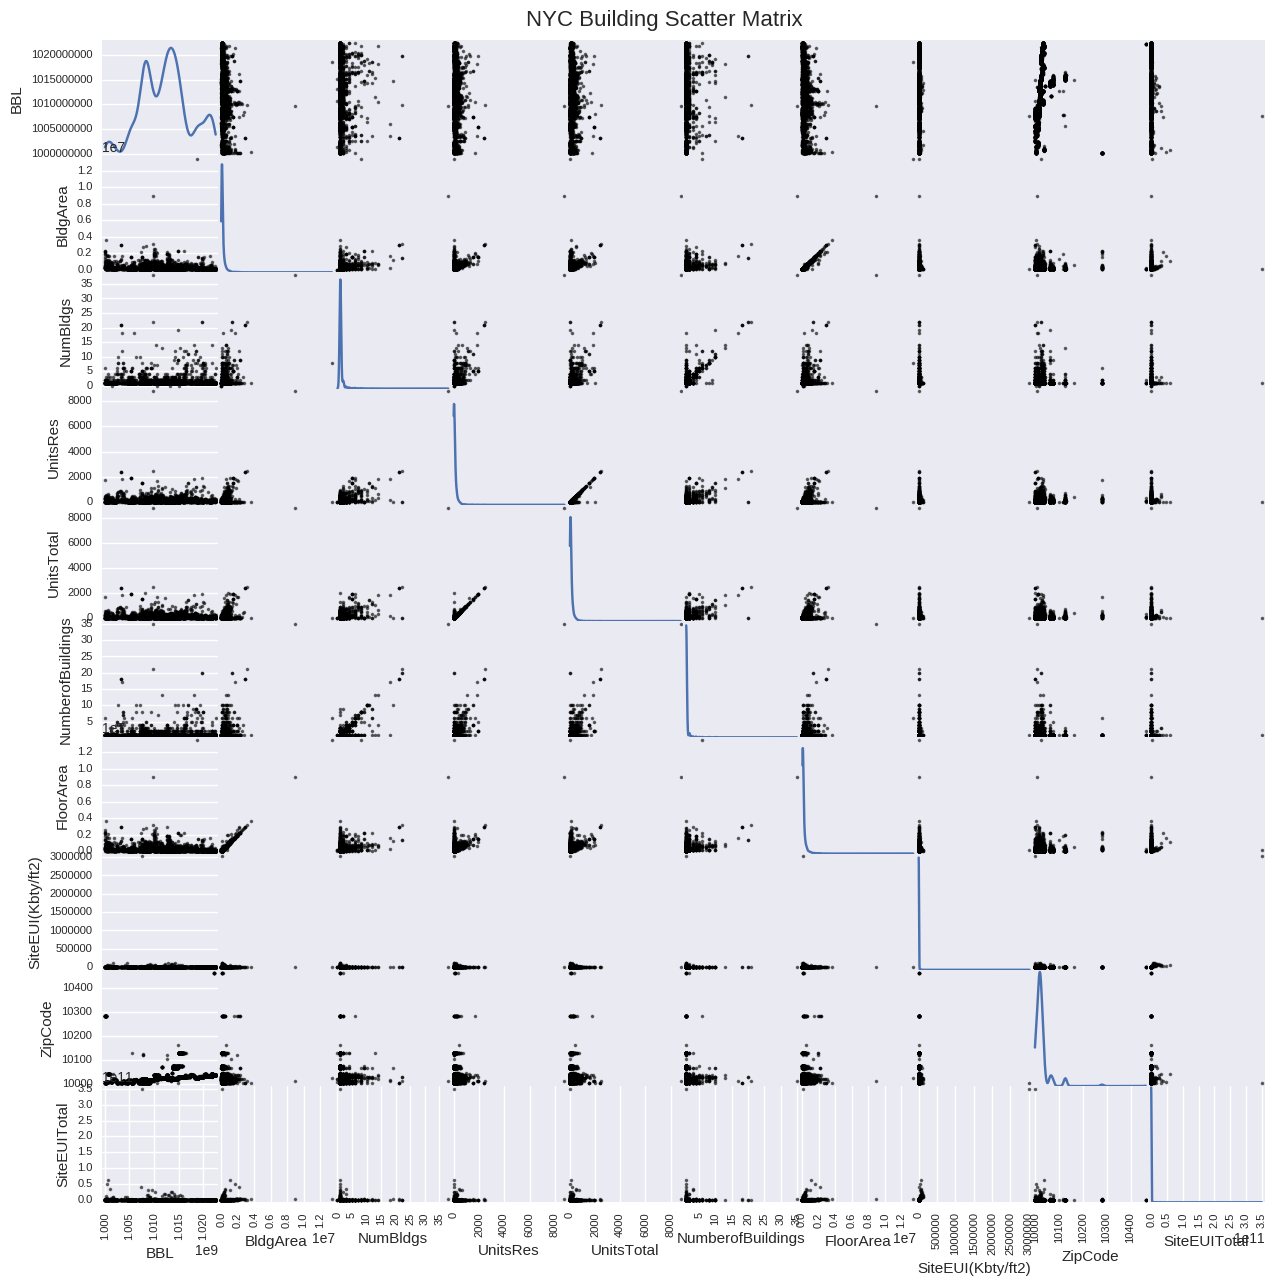

In [12]:
figbldnrg = pd.scatter_matrix(bldnrg, linewidth= 1, 
                              s=10, alpha = 0.5, c = 'k', 
                              figsize=(15, 15), diagonal='kde')
pl.suptitle('NYC Building Scatter Matrix', y = 0.92, fontsize = 16)
pl.show()

#### Figure 1. NYC building scatter plot matrix, displaying the relationships between each field in bldnrg dataframe.

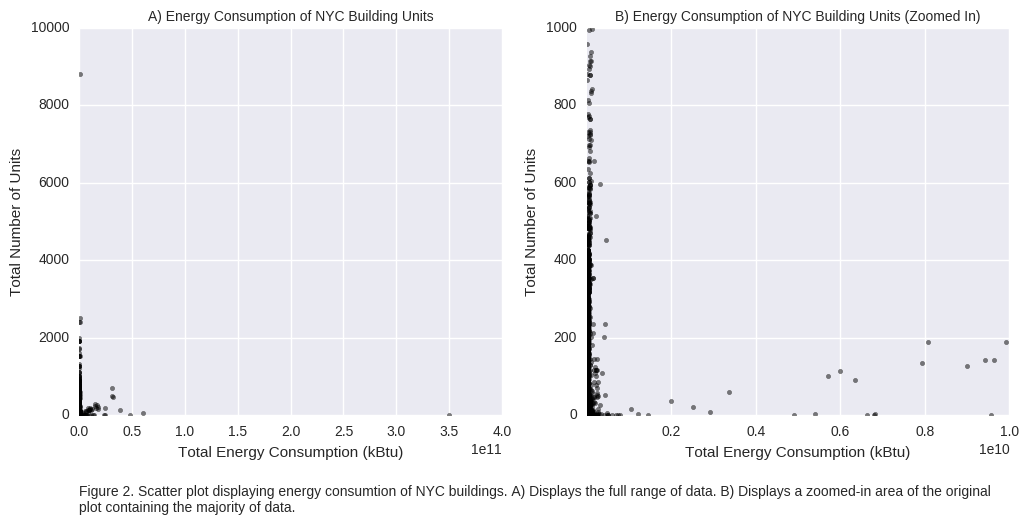

In [13]:
fig, (ax1, ax2) = pl.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
ax1.scatter(bldnrg['SiteEUITotal'], bldnrg['UnitsTotal'],
           alpha=0.5, s = 10, c = 'k')
ax1.axis([0, 400000000000, 0, 10000])
ax1.set_ylabel('Total Number of Units')
ax1.set_xlabel('Total Energy Consumption (kBtu)')
ax1.set_title('A) Energy Consumption of NYC Building Units', fontsize = 10)
ax2.scatter(bldnrg['SiteEUITotal'], bldnrg['UnitsTotal'],
           alpha=0.5, s = 10, c = 'k')
ax2.axis([1000, 10000000000, 0, 1000])
ax2.set_ylabel('Total Number of Units')
ax2.set_xlabel('Total Energy Consumption (kBtu)')
ax2.set_title('B) Energy Consumption of NYC Building Units (Zoomed In)', fontsize = 10)

ax1.text(0, -2500, 'Figure 2. Scatter plot displaying energy consumtion \
of NYC buildings. A) Displays the full range of data. B) Displays a zoomed-in \
area of the original \nplot containing the majority of data.')

In [14]:
bldnrg.drop(bldnrg[bldnrg['UnitsTotal'] < 1].index, axis = 0, inplace = True)
bldnrg.drop(bldnrg[bldnrg['SiteEUITotal'] < 1].index, axis = 0, inplace = True)
bldnrg['LogUnitsTotal'] = np.log10(bldnrg['UnitsTotal'])
bldnrg['LogSiteEUITotal'] = np.log10(bldnrg['SiteEUITotal'])
bldnrg.drop(bldnrg[bldnrg['LogUnitsTotal'] < 1].index, axis = 0, inplace = True)
bldnrg.dropna(axis = 0, how = 'any', subset = ['LogSiteEUITotal'], inplace = True)

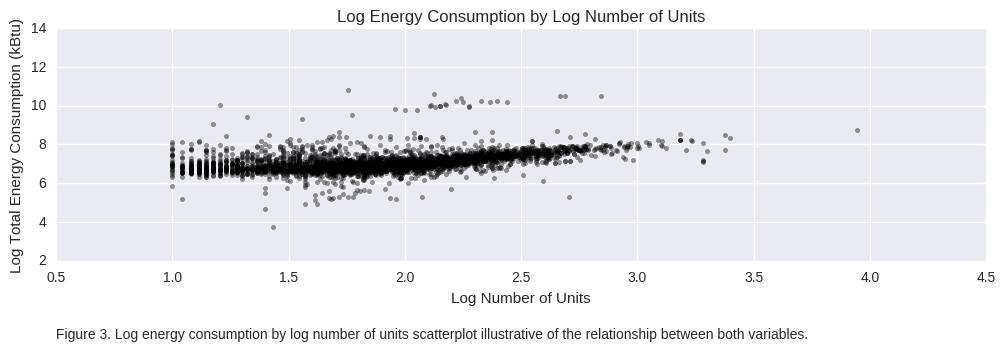

In [25]:
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 3))
ax1.scatter(bldnrg['LogUnitsTotal'], bldnrg['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k')
ax1.axis([0.5, 4.5, 2, 14])
ax1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax1.set_xlabel('Log Number of Units')
ax1.set_title('Log Energy Consumption by Log Number of Units')
ax1.text(0.5, -2, 'Figure 3. Log energy consumption by log number of units scatterplot illustrative \
of the relationship between both variables.')

# 3. Fit The Data

### 1. Fit a line to Units vs. Energy

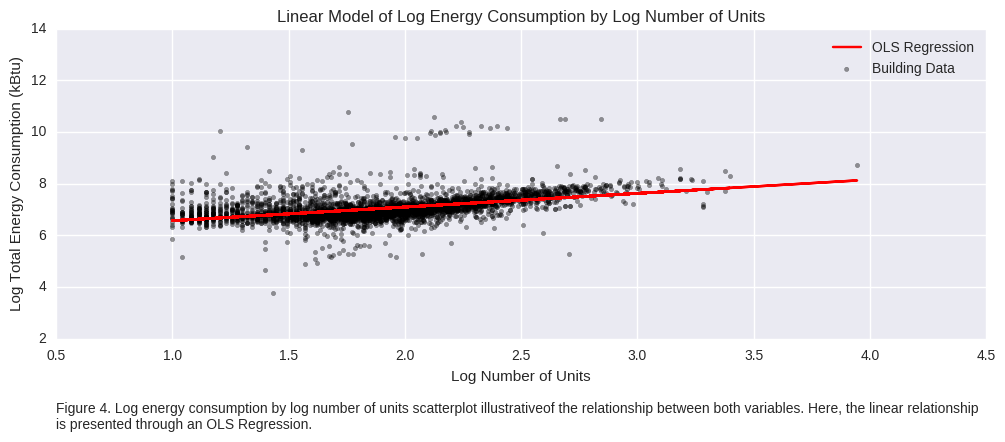

In [16]:
results1 = smf.ols('LogSiteEUITotal ~ LogUnitsTotal', data = bldnrg).fit()
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 4))
ax1.scatter(bldnrg['LogUnitsTotal'], bldnrg['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax1.axis([0.5, 4.5, 2, 14])
ax1.plot(bldnrg['LogUnitsTotal'], results1.predict(), c = 'r', 
         label = 'OLS Regression')
ax1.set_xlabel('Log Number of Units')
ax1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax1.set_title('Linear Model of Log Energy Consumption by Log Number of Units')
ax1.text(0.5, -1.5, 'Figure 4. Log energy consumption by log number of units scatterplot illustrative\
of the relationship between both variables. Here, the linear relationship \nis presented through an OLS Regression.')
ax1.legend()

In [17]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LogSiteEUITotal   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     981.8
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          4.86e-193
Time:                        13:03:41   Log-Likelihood:                -2380.7
No. Observations:                4025   AIC:                             4765.
Df Residuals:                    4023   BIC:                             4778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         6.0346      0.033    183.904      0.000         5.970     6.099
LogUnitsTotal     0.5288      0.017     31.334      0.000         0.496     0.562
==============================================================================
Omnibus:                     2178.229   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45049.993
Skew:                           2.129   Prob(JB):                         0.00
Kurtosis:                      18.827   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Fit a line to Energy vs. Units

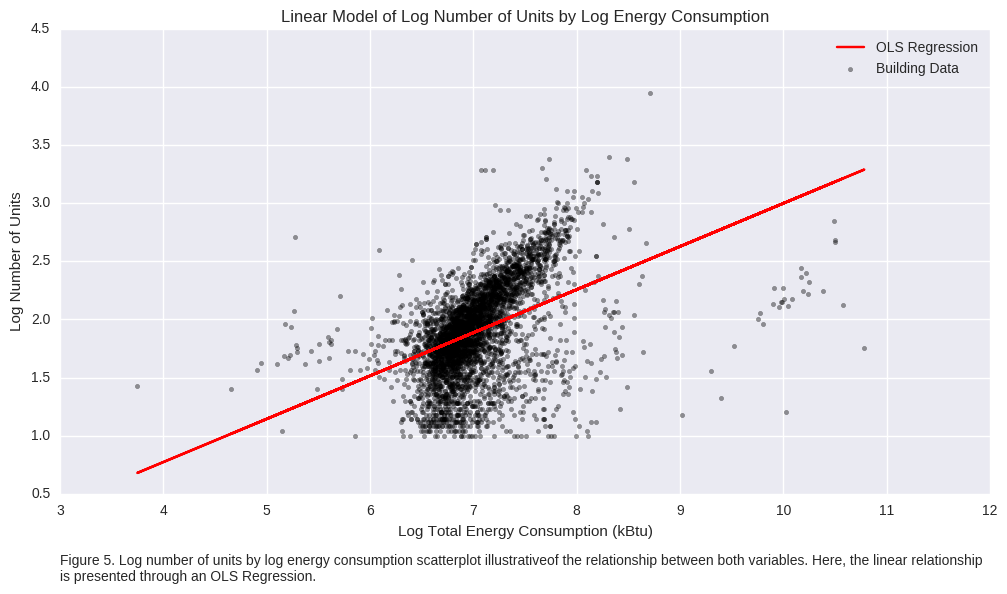

In [18]:
results2 = smf.ols('LogUnitsTotal ~ LogSiteEUITotal', data = bldnrg).fit()
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
ax1.scatter(bldnrg['LogSiteEUITotal'], bldnrg['LogUnitsTotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax1.axis([3, 12, 0.5, 4.5])
ax1.plot(bldnrg['LogSiteEUITotal'], results2.predict(), c = 'r', 
         label = 'OLS Regression')
ax1.set_ylabel('Log Number of Units')
ax1.set_xlabel('Log Total Energy Consumption (kBtu)')
ax1.set_title('Linear Model of Log Number of Units by Log Energy Consumption')
ax1.text(3, -0.25, 'Figure 5. Log number of units by log energy consumption scatterplot illustrative\
of the relationship between both variables. Here, the linear relationship \nis presented through an OLS Regression.')
ax1.legend()

In [19]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogUnitsTotal   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     981.8
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          4.86e-193
Time:                        13:03:42   Log-Likelihood:                -1667.0
No. Observations:                4025   AIC:                             3338.
Df Residuals:                    4023   BIC:                             3351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.7106      0.084     -8.506      0.000        -0.874    -0.547
LogSiteEUITotal     0.3709      0.012     31.334      0.000         0.348     0.394
==============================================================================
Omnibus:                      161.469   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.478
Skew:                          -0.443   Prob(JB):                     7.96e-44
Kurtosis:                       3.630   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Evaluate which is better by calculating the chi square.

In [26]:
#Units vs. Energy chi square.
bldnrg = bldnrg.sort_values('LogSiteEUITotal')
chisq1 = np.sum(((results1.predict()-bldnrg['LogSiteEUITotal'])**2)/(bldnrg['LogSiteEUITotal']))
print chisq1
scipy.stats.chisquare(bldnrg['LogSiteEUITotal'], f_exp = results1.predict())

155.329827652


Power_divergenceResult(statistic=164.06534007475256, pvalue=1.0)

In [27]:
#Energy vs. Units chi square.
bldnrg = bldnrg.sort_values('LogUnitsTotal')
chisq2 = np.sum(((results2.predict()-bldnrg['LogUnitsTotal'])**2)/(bldnrg['LogUnitsTotal']))
print chisq2
scipy.stats.chisquare(bldnrg['LogUnitsTotal'], f_exp = results2.predict())

457.523947061


Power_divergenceResult(statistic=411.95929882349071, pvalue=1.0)

The linear model of units vs. energy is a better fit than the energy vs. units model. Chi-square(units vs. energy) < Chi-square(energy vs. units)

### 4. Fit a 2nd degree polynomial

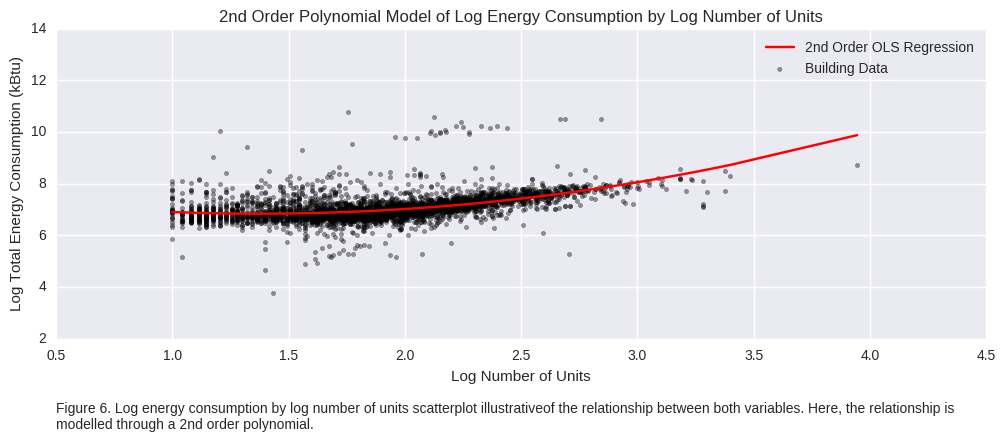

In [22]:
bldnrg = bldnrg.sort_values('LogUnitsTotal')
bldnrg['LogUnitsTotal2'] = bldnrg['LogUnitsTotal'] ** 2
results3 = smf.ols('LogSiteEUITotal ~ LogUnitsTotal2 + LogUnitsTotal',
                   data = bldnrg).fit()
results3.params
fig, (ax1) = pl.subplots(nrows = 1, ncols = 1, figsize = (12, 4))
ax1.scatter(bldnrg['LogUnitsTotal'], bldnrg['LogSiteEUITotal'],
           alpha=0.4, s = 10, c = 'k', label = 'Building Data')
ax1.axis([0.5, 4.5, 2, 14])
ax1.plot(bldnrg['LogUnitsTotal'], results3.predict(), c = 'r', label = '2nd Order OLS Regression')
ax1.set_xlabel('Log Number of Units')
ax1.set_ylabel('Log Total Energy Consumption (kBtu)')
ax1.set_title('2nd Order Polynomial Model of Log Energy Consumption by Log Number of Units')
ax1.text(0.5, -1.5, 'Figure 6. Log energy consumption by log number of units scatterplot illustrative\
of the relationship between both variables. Here, the relationship is \nmodelled through a 2nd order polynomial.')
ax1.legend()

In [23]:
chisq1 = np.sum(((results3.predict()-bldnrg['LogSiteEUITotal'])**2)/(bldnrg['LogSiteEUITotal']))
print chisq1

results3.summary()

94.5898633039


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LogSiteEUITotal   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     668.9
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          1.59e-251
Time:                        13:03:43   Log-Likelihood:                -2242.2
No. Observations:                4025   AIC:                             4490.
Df Residuals:                    4022   BIC:                             4509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          7.7035      0.104     74.372      0.000         7.500     7.907
LogUnitsTotal2     0.4598      0.027     16.924      0.000         0.407     0.513
LogUnitsTotal     -1.2634      0.107    -11.791      0.000        -1.473    -1.053
==============================================================================
Omnibus:                     2326.965   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60192.633
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      21.398   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Idea: The polynomial model is a better fit than the linear model
$H_o$: The polynomial model is as good or a significantly worse fit than the linear model (p=0.05).

$H_a$: The polynomial model is a significantly better fit than the linear model (p=0.05).

In [24]:
lr = -2 * (-results3.llf - (-results1.llf))
print lr
results3.compare_lr_test(results1)

276.880869507


(276.88086950710294, 3.5918822608714782e-62, 1.0)

#### The LR test statistic is 276.9, with a corresponding p-value of ~ 0. Accordingly, we can reject the null hypothesis and the accept alternative hypothesis: the second order polynomial fits the data significantly better than the linear model.